In [40]:
import math

import numpy as np
from matplotlib import pyplot as plt

# Задание 1a

m = 4, T = 3.0
m = 5, T = 2.4
m = 7, T = 1.7142857142857144
m = 10, T = 1.2


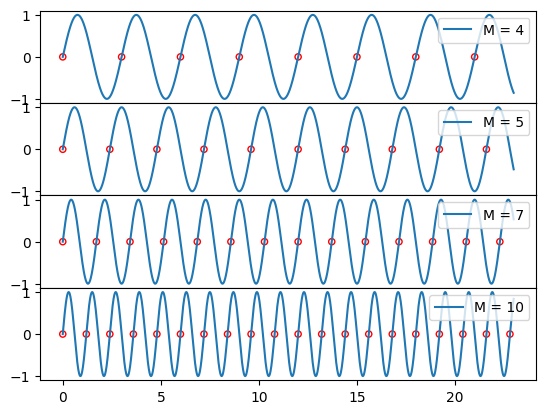

In [41]:
def get_sin_period(a):
    return 2 * math.pi / abs(a)

N = 12
m = np.atleast_2d(np.array([4, 5, 7, 10]))
x = np.arange(0, 2 * N - 1, 0.01)
y = np.sin(2 * np.pi * m.T * x / N)

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, (y_local, m_val) in enumerate(zip(y, m[0])):
    ax = fig.add_subplot(m.shape[1], 1, i + 1)
    ax.plot(x, y_local, label=f'M = {m_val}')
    period = get_sin_period(2 * np.pi * m_val / N)
    period_x = np.arange(0, 2 * N - 1, period)
    period_y = np.zeros(period_x.shape)
    print(f'm = {m_val}, T = {period}')
    ax.scatter(period_x, period_y, 20, c='None', edgecolors='red')
    ax.legend(loc='upper right')

$$ T = \frac{2\pi}{|A|},\ x[n] = sin(An) $$
Для $ A = \frac{2\pi m}{N} $, выражение принимает следующий вид:
$$ T = |\frac{n}{m}|$$

# Задание 1b

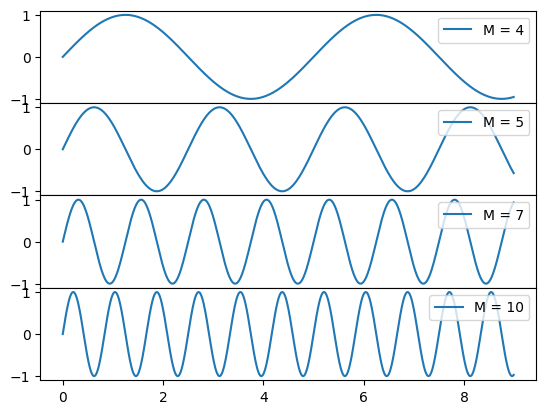

In [42]:
k = np.atleast_2d(np.array([1, 2, 4, 6]))
x = np.arange(0, 9, 0.01)
y = np.sin(2 * np.pi * k.T * x / 5)

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, (y_local, m_val) in enumerate(zip(y, m[0])):
    ax = fig.add_subplot(m.shape[1], 1, i + 1)
    ax.plot(x, y_local, label=f'M = {m_val}')
    ax.legend(loc='upper right')

Одинаковых сигналов нет

# Задание 1c

Сигнал $x_1[n] = cos(\frac{2\pi n}{N}) + 2 cos(\frac{3\pi n}{N}),\ N = 6$ является периодическим с периодом $T = 12$

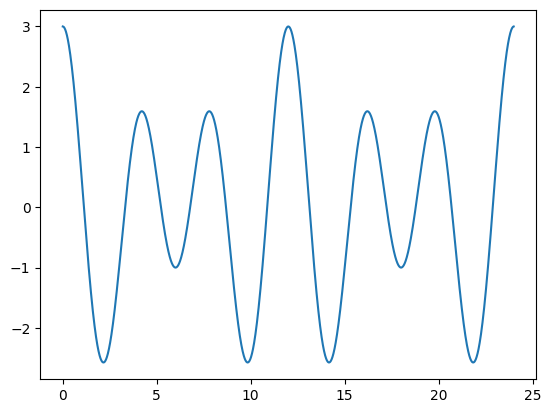

In [43]:
N = 6
x = np.arange(0, 24, 0.01)
y = np.cos(2 * np.pi * x / N) + 2 * np.cos(3 * np.pi * x / N)

plt.plot(x, y);

Сигнал $x_2[n] = 2cos(\frac{2n}{N}) + cos(\frac{3n}{N}),\ N = 6$ является периодическим с периодом $T = 12\pi \approx 37,7$

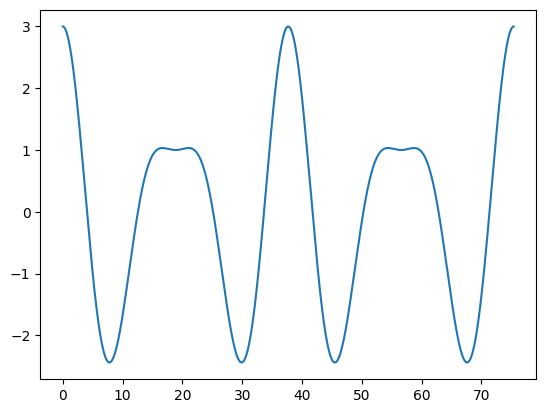

In [44]:
N = 6
x = np.arange(0, 24 * np.pi, 0.01)
y = 2 * np.cos(2 * x / N) + np.cos(3 * x / N)

plt.plot(x, y);

Сигнал $x_3[n] = cos(\frac{2\pi n}{N}) + 3sin(\frac{5\pi n}{2N}),\ N = 6$ является периодическим с периодом $T = 24$

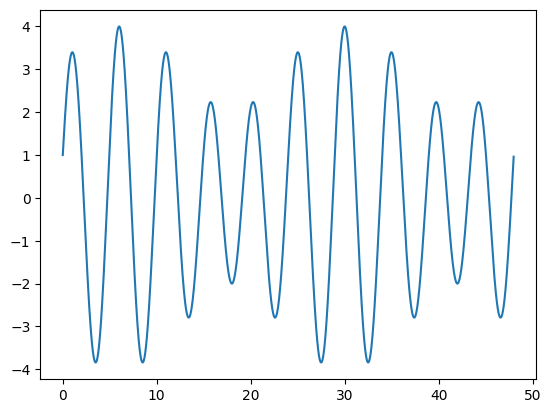

In [45]:
N = 6
x = np.arange(0, 48, 0.01)
y = np.cos(2 * np.pi * x / N) + 3 * np.sin(5 * np.pi * x / (2 * N))

plt.plot(x, y);

# Задание 1d

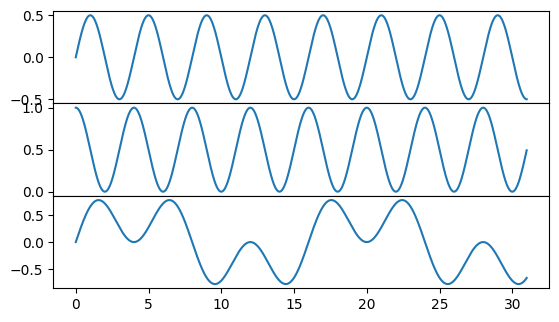

In [46]:
x = np.arange(0, 31, 0.01)
y = [
    np.sin(np.pi * x / 4) * np.cos(np.pi * x / 4),
    (np.cos(np.pi * x / 4) ** 2),
    np.sin(np.pi * x / 4) * np.cos(np.pi * x / 8)
    ]

plt.subplots_adjust(hspace=0.000)
fig = plt.figure(1)
for i, (y_local, m_val) in enumerate(zip(y, m[0])):
    ax = fig.add_subplot(m.shape[1], 1, i + 1)
    ax.plot(x, y_local)

Для первого сигнала период равен $T_1 = 4$, для второго $T_2 = 4$, для третьего $T_3 = 16$
Без рисунков, найти период можно исходя из определения периодичности $x[n] = x[n + N]$ и периодичности синуса и косинуса

# Задание 1e
Результат сложения двух периодических сигналов не всегда будет периодическим сигналом, пример $x[n]=sin(n)+cos(2\pi n)$. Период $sin(n)$ равен $2\pi$, период $cos(2\pi n)$ равен $1$, следовательно не найдется двух целых чисел $a$ и $b$, что $a * 1 = b * 2\pi$, а значит общего периода для них не будет. Для произведения аналогично

# Задание 2a,b

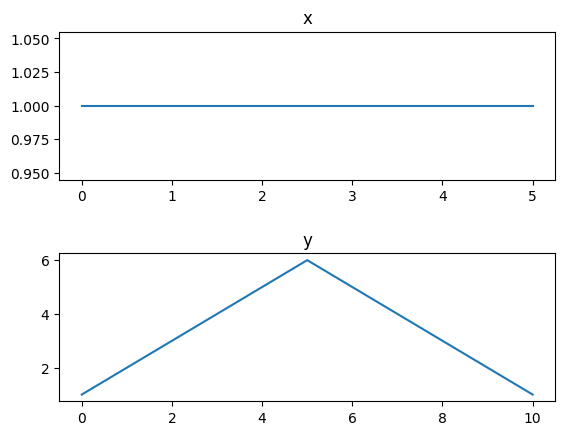

In [62]:
def convolution(nx, x, nh, h):
    yn = np.arange(nx[0] + nh[0], nx[-1] + nh[-1] + 1)
    y = np.convolve(x, h)
    return yn, y

def subplot(*args):
    plt.subplots_adjust(hspace=0.5)
    fig = plt.figure(1)
    rows = len(args)
    for i, tpl in enumerate(args):
        xn, x, *rest = tpl
        ax = fig.add_subplot(rows, 1, i + 1)
        ax.plot(xn, x)
        if rest:
            ax.set_title(rest[0])

sn = np.arange(6)
s = np.ones(6)

yn, y = convolution(sn, s, sn, s)
subplot((sn, s, 'x'), (yn, y, 'y'))

# Задание 2c

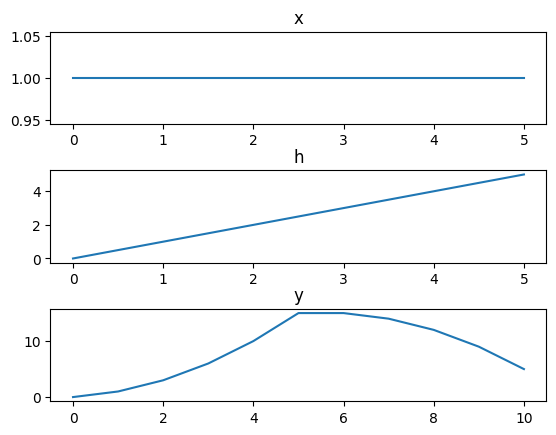

In [63]:
xn = np.arange(6)
x = np.ones(6)

hn = np.arange(6)
h = np.arange(6)

yn, y = convolution(xn, x, hn, h)

subplot((xn, x, 'x'), (hn, h, 'h'), (yn, y, 'y'))

# Задание 2d

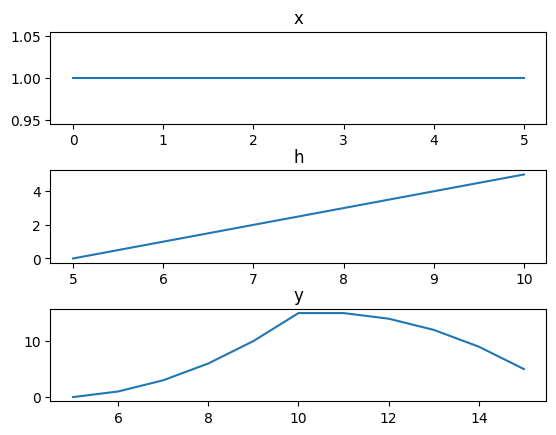

In [65]:
xn = np.arange(6)
x = np.ones(6)

hn = np.arange(6) + 5
h = np.arange(6)

yn, y = convolution(xn, x, hn, h)

subplot((xn, x, 'x'), (hn, h, 'h'), (yn, y, 'y'))